In [1]:
import json

In [10]:
from utils.data_aug import *
from utils.bbox_util import *
import numpy as np 
import cv2
import os
import matplotlib.pyplot as plt
from PIL import Image

(300, 409, 3)
[[150, 12, 390, 295], [144, 96, 375, 298]] [1, 1]
[[150  12 390 295   1]
 [144  96 375 298   1]]


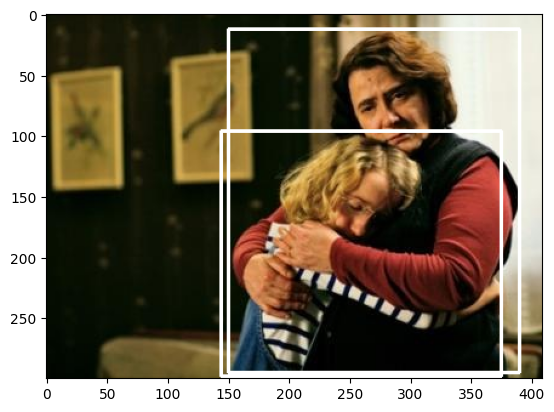

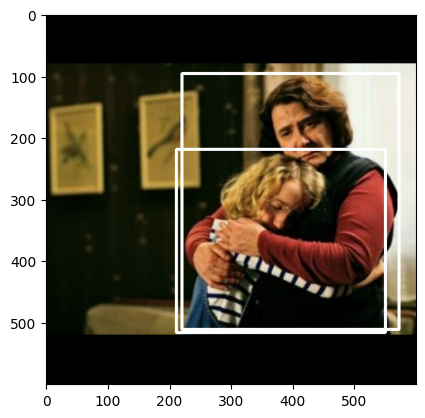

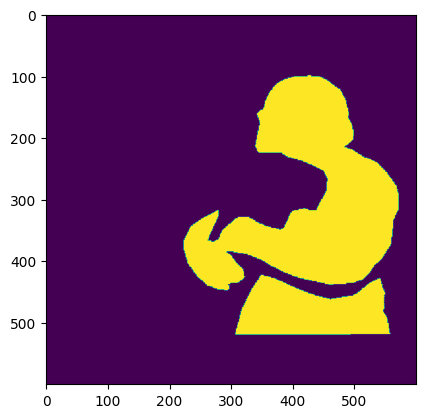

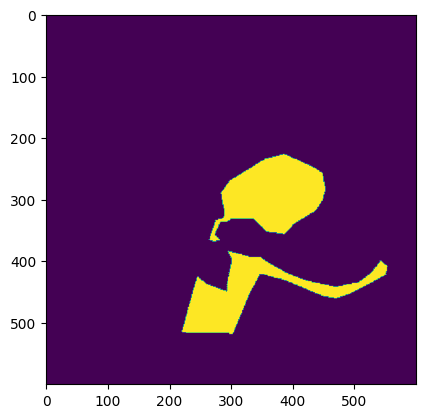

In [20]:
img = cv2.imread("D:\Rutgers\Fall 2022\CS 535 - Machine Learning I\mask_rcnn_pytorch\data\images\\000001.jpg")[:,:,::-1]
img = np.array(Image.open("D:\Rutgers\Fall 2022\CS 535 - Machine Learning I\mask_rcnn_pytorch\data\images\\000001.jpg"))
print(img.shape)
with open("D:\Rutgers\Fall 2022\CS 535 - Machine Learning I\mask_rcnn_pytorch\data\\annotations\\000001.json") as f:
    img_id, annotations = json.load(f)
#anno
print(annotations["boxes"], annotations["labels"])
bboxes = np.array([annotations["boxes"][i] + [annotations["labels"][i]] for i in range(len(annotations["labels"]))])
print(bboxes)
plotted_img = draw_rect(img, bboxes)
plt.imshow(plotted_img)
plt.show()

#seq = Sequence([RandomHorizontalFlip(), RandomScale(), RandomTranslate(), RandomRotate(10), RandomShear()])
#img_, bboxes_ = seq(img.copy(), bboxes.copy())
img_, bboxes_ = Resize(600)(img, bboxes)
plotted_img = draw_rect(img_, bboxes_)
plt.imshow(plotted_img)
plt.show()

for mask in annotations["masks"]:
    mask = np.array(mask).astype('uint8')
    mask_ = np.expand_dims(mask, -1)
    mask_, _ = Resize(600)(mask_, bboxes)
    plt.imshow(mask_)
    plt.show()

(300, 409)
(300, 409, 1)
Canvas Shape: (300, 409, 1)
Image Shape OG: (300, 409, 1)
Image Shape: (297, 404)


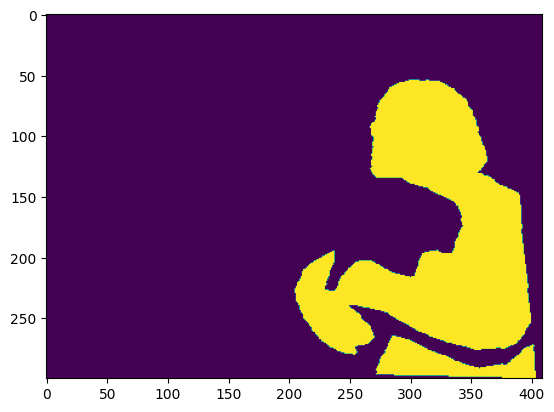

In [5]:
mask = np.array(annotations["masks"][0]).astype('uint8')
print(mask.shape)
mask_ = np.expand_dims(mask, -1)
print(mask_.shape)
#plt.imshow(mask)
#plt.show()

mask__, _ = seq(mask_.copy(), bboxes.copy())
plt.imshow(mask__)
plt.show()

In [15]:
with open("D:\Rutgers\Fall 2022\CS 535 - Machine Learning I\mask_rcnn_pytorch\data\data\\000002.json") as f:
    annotations = json.load(f)
print(type(annotations[0]), type(annotations[1]))
print(annotations[1].keys())

print(list(map(_get_area, annotations[1]["boxes"])))
print(isCrowd
#print(annotations[0].keys())
    #boxes = []
    #target["boxes"] = boxes
    #    target["labels"] = labels
    #    target["masks"] = masks
    #    target["image_id"] = image_id
    #    target["area"] = area
    #    target["iscrowd"] = iscrowd
    #target = {}
#for annotation in annotations:
#    target["boxes"] = target.get("boxes", []) + [annotation]


<class 'str'> <class 'dict'>
dict_keys(['boxes', 'labels', 'masks', 'isCrowd'])
[232232, 167862]


In [1]:
import pickle
with open("D:\Rutgers\Fall 2022\CS 535 - Machine Learning I\mask_rcnn_pytorch\out\loss\\2.pkl", "rb") as f:
    abc = pickle.load(f)
abc

{'loss_classifier': 0.06268041580915451,
 'loss_box_reg': 0.07054121047258377,
 'loss_mask': 0.48738861083984375,
 'loss_objectness': 0.005182226654142141,
 'loss_rpn_box_reg': 0.0025273640640079975}